In [1]:
import pandas as pd
import numpy as np

In [2]:
dtrain = pd.read_csv('./train.csv')
dtest = pd.read_csv('./test.csv')

In [3]:
from sklearn import cross_validation

x_train, x_valid, y_train, y_valid = cross_validation.train_test_split(
dtrain.drop(('label'), axis=1).astype('float32')/255.0,        
dtrain['label'],                                              
test_size = 0.2,
random_state = 11)

C:\Users\atama\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

model = Sequential()
model.add(Dense(800, input_dim=x_train.shape[1], activation="relu", kernel_initializer="normal", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(600, activation="relu", kernel_initializer="normal"))
model.add(Dense(10, activation="softmax", kernel_initializer="normal"))

C:\Users\atama\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10, batch_size=400)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 10s 294us/step - loss: 6.3977 - acc: 0.8876 - val_loss: 1.6581 - val_acc: 0.9354
Epoch 2/10
33600/33600 [==============================] - 9s 278us/step - loss: 0.8113 - acc: 0.9455 - val_loss: 0.4187 - val_acc: 0.9490
Epoch 3/10
33600/33600 [==============================] - 9s 281us/step - loss: 0.3187 - acc: 0.9546 - val_loss: 0.2898 - val_acc: 0.9525
Epoch 4/10
33600/33600 [==============================] - 9s 281us/step - loss: 0.2577 - acc: 0.9564 - val_loss: 0.2604 - val_acc: 0.9570
Epoch 5/10
33600/33600 [==============================] - 9s 279us/step - loss: 0.2220 - acc: 0.9647 - val_loss: 0.2501 - val_acc: 0.9537
Epoch 6/10
33600/33600 [==============================] - 9s 280us/step - loss: 0.2255 - acc: 0.9623 - val_loss: 0.2484 - val_acc: 0.9607
Epoch 7/10
33600/33600 [==============================] - 9s 279us/step - loss: 0.2069 - acc: 0.9670 - val_loss: 0.2225 - 

In [7]:
predictions = model.predict_classes(dtest, verbose=0)

In [9]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions})
submissions.to_csv("predictions.csv", index=False, header=True)

In [10]:
import pickle

LRmodel = pickle.load(open('LearnedLRmodel.sav', 'rb'))

In [11]:
from sklearn import metrics

metrics.accuracy_score(LRmodel.predict(x_valid), y_valid)

0.9154761904761904

### Сеть получилась лучше, чем логрег

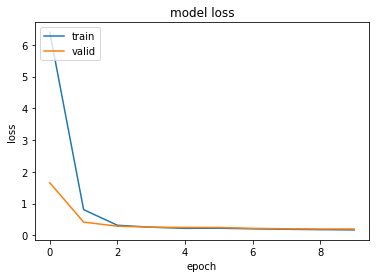

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()